## 영화 감상 리뷰 Classification

- **이름: 원알렉스**
- **학번: 20185143**
- **학과: 빅데이터**

In [1]:
import numpy as np
import pandas as pd

### #1. 데이터 불러오기

In [2]:
reviews = pd.read_csv('../data/IMDB_dataset.csv')

> - 처음 5개의 데이터 확인
> - 여기서도 볼수 있듯이 데이터 중간에 불필요한 텍스트들이 존재
> - 결과값도 또한 이산값이 아님

In [3]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


> - review와 sentiment 두개의 칼럼으로 이루어진 데이터
> - 총 50000개의 샘플 데이터를 가지고 null값은 없으므로 제거해줄 필요가 없음

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


> - sentiment의 값을 확인해보면 균등하게 나뉘어져 있으므로
> - 데이터 불균형으로 인한 모델의 일반화 성능 왜곡이 발생하진 않음

In [5]:
reviews['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### #2. 샘플 하나를 가지고 NLP를 어떻게 진행하는 것인지에 대한 예시

> - 샘플 데이터를 확인해보면 중간에 불필요한 텍스트들이 존재함

In [6]:
review = reviews['review'].loc[1]
review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

> NLP 전처리 과정
> - HTML 태그 제거
> - 특수기호와 문장기호 제거
> - 불용어 제거
> - Stemming/Lemmatization

> 1. HTML 태그 제거

In [7]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

> 2. Regular Expressions 라이브러리를 통해 단어들을 제외한 모든 문장기호와 특수기호들을 제거

In [8]:
import re

review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z]', ' ', review)
review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

> 3. 텍스트들을 모두 균일하게 소문자로 변환

In [9]:
review = review.lower()
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

> 4. 불용어 제거를 하기 위해서, 모든 단어들을 검사해야되므로 개별적인 항목으로 split

In [10]:
review = review.split()
review

['a',
 'wonderful',
 'little',
 'production',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'the',
 'realism',
 'really',
 'co

> 5. 불용어 제거 - stopwords 세트에 있는 단어들은 모두 제거

In [11]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

review = [word for word in review if not word in set(stopwords.words('english'))]
review

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

> 6. Stemming/Lemmatization - 단어의 원형 상태로 변환

> - Stemming은 단어 자체만을 판단 후 변환
> - Lemmatization은 단어가 포함된 문장에서의 품사까지 판단하여 변환

In [12]:
# 결과를 보시면 품사를 판단하지 않아서 정확한 원형 형태가 되지 않음
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
review_s = [ps.stem(word) for word in review]
review_s

['wonder',
 'littl',
 'product',
 'film',
 'techniqu',
 'unassum',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comfort',
 'sometim',
 'discomfort',
 'sens',
 'realism',
 'entir',
 'piec',
 'actor',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voic',
 'pat',
 'truli',
 'see',
 'seamless',
 'edit',
 'guid',
 'refer',
 'william',
 'diari',
 'entri',
 'well',
 'worth',
 'watch',
 'terrificli',
 'written',
 'perform',
 'piec',
 'master',
 'product',
 'one',
 'great',
 'master',
 'comedi',
 'life',
 'realism',
 'realli',
 'come',
 'home',
 'littl',
 'thing',
 'fantasi',
 'guard',
 'rather',
 'use',
 'tradit',
 'dream',
 'techniqu',
 'remain',
 'solid',
 'disappear',
 'play',
 'knowledg',
 'sens',
 'particularli',
 'scene',
 'concern',
 'orton',
 'halliwel',
 'set',
 'particularli',
 'flat',
 'halliwel',
 'mural',
 'decor',
 'everi',
 'surfac',
 'terribl',
 'well',
 'done']

In [13]:
# Stemming 보다 정확한 결과를 보여줌
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwell',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

> 7. 다시 한 덩어리로 변환

In [14]:
# 결과를 보시면 분석에 영향을 미칠 필요한 단어들만으로 이루어짐
review = ' '.join(review)
review

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

> 8. 이 단어들을 벡터화 시켜야하므로, 먼저 말뭉치(corpus)에 추가

In [15]:
corpus = []  # 말뭉치 생성
corpus.append(review)

9. 벡터화를 위해서 다음과 같은 모델들을 적용

> - CountVectorizer (Bag of Words Model)
> - TfidfVectorizer (Bag of Words Model)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()  # 모델 생성
review_count_vec = count_vec.fit_transform(corpus)  # 말뭉치를 가지고 벡터화

review_count_vec.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1]], dtype=int64)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()  # 모델 생성
review_tfidf_vec = tfidf_vec.fit_transform(corpus)  # 말뭉치를 가지고 벡터화

review_tfidf_vec.toarray()

array([[0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.19425717,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.19425717, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.29138576, 0.09

> 10. 결과값(y)들을 이산적인 값으로 변환

In [18]:
reviews['sentiment'] = reviews['sentiment'].map({'positive': 1, 'negative': 0})

### #3. 위와 같은 과정으로 전체 데이터에 적용

> 1. 데이터 전처리

In [20]:
corpus = []

for i in range(len(reviews)):
    soup = BeautifulSoup(reviews['review'][i], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

> 2. CountVectorizer Model

In [22]:
# CountVectorizer Model
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만든다.
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=50000, min_df=5, stop_words='english')
X_cv = cv.fit_transform(corpus)  # 벡터화
y_cv = reviews.iloc[0:50000, 1].values

In [23]:
# 훈련셋과 테스트셋 분할
from sklearn.model_selection import train_test_split

X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_cv, y_cv, test_size = 0.20, random_state = 0)

In [46]:
# LogisticRegression - CountVectorizer
# 과대적합 발생
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_cv_train, y_cv_train)
print('훈련 세트 정확도: {:.2f}'.format(lr.score(X_cv_train, y_cv_train)))
print('테스트 세트 정확도: {:.2f}'.format(lr.score(X_cv_test, y_cv_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.88


C:\Users\lg\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
# 교차검증 - CountVectorizer
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_cv_train, y_cv_train, cv=5)
print('교차 검증 평균 점수: {:.2f}'.format(np.mean(scores)))

C:\Users\lg\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lg\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


교차 검증 평균 점수: 0.88


C:\Users\lg\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
# GridSearchCV - CountVectorizer
# 과대적합 조금 완화됨
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_cv_train, y_cv_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))
print('최적의 매개변수: ', grid.best_params_)
print('최적의 매개변수를 사용한 훈련 점수: {:.2f}'.format(grid.score(X_cv_train, y_cv_train)))
print('최적의 매개변수를 사용한 테스트 점수: {:.2f}'.format(grid.score(X_cv_test, y_cv_test)))

C:\Users\lg\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lg\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


최상의 교차 검증 점수: 0.88
최적의 매개변수:  {'C': 0.1}
최적의 매개변수를 사용한 훈련 점수: 0.96
최적의 매개변수를 사용한 테스트 점수: 0.89


C:\Users\lg\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\lg\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\lg\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


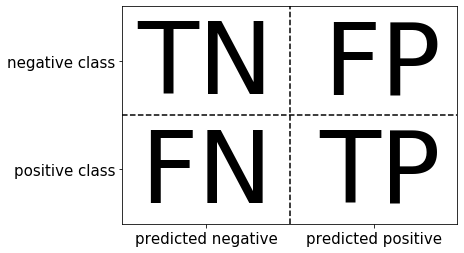

In [48]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [29]:
from sklearn.metrics import confusion_matrix

y_cv_pred = grid.predict(X_cv_test)
confusion = confusion_matrix(y_cv_test, y_cv_pred)
print(confusion)

[[4445  590]
 [ 532 4433]]


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_cv_test, y_cv_pred, target_names=['Negative', 'Postive']))

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.89      5035
     Postive       0.88      0.89      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

